In [81]:
import subprocess
import pandas as pd
import os
import matplotlib.pyplot as plt

In [82]:
org_heats_dir = ""
interested_file = "obj_dump.txt"
org_heats_file = os.path.join(org_heats_dir, interested_file)
# columns = ["timestamp", "addr", "hotness"]
columns = ["timestamp", "addr", "diff0", "diff1",
           "diff2", "diff3", "diff4", "diff5", "diff6", "hotness"]
org_df = pd.read_csv(org_heats_file, sep="\t", header=None, names=columns)
print(org_df.dtypes)

timestamp    float64
addr           int64
diff0          int64
diff1          int64
diff2          int64
diff3          int64
diff4          int64
diff5          int64
diff6          int64
hotness        int64
dtype: object


In [83]:
condition_no93 = org_df['addr'].astype(str).str.startswith('9')
with_93 = org_df[condition_no93]
org_df = org_df[~condition_no93]

In [84]:
# condition = (org_df[['diff0', 'diff1', 'diff2', 'diff3',
#              'diff4', 'diff5', 'diff6']] == 127).any(axis=1)
# org_df.loc[condition, 'hotness'] = 7
# num_matching_rows = condition.sum()
# print(num_matching_rows)

In [85]:
# condition = (org_df[['diff0', 'diff1', 'diff2', 'diff3', 'diff4', 'diff5', 'diff6']] == 0).all(axis=1)
# org_df.loc[condition, 'hotness'] = 1
# num_matching_rows = condition.sum()
# print(num_matching_rows)

In [86]:
org_df_sorted = org_df.sort_values(by=['timestamp', 'addr']) # get sorted df
# first_half_df = org_df_sorted.iloc[:len(org_df) // 2] # get first half of sorted df
# org_df_sorted = first_half_df

In [87]:
# # Find duplicates based on 'addr' and 'timestamp' columns
# duplicates = org_df_sorted[org_df_sorted.duplicated(
#     subset=['addr', 'timestamp'], keep=False)]
# org_df_sorted = org_df_sorted.drop_duplicates(subset=['addr', 'timestamp'])

In [88]:
x_min_all = org_df_sorted['timestamp'].min()
y_min_all = org_df_sorted['addr'].min()
org_df_sorted['timestamp'] = org_df_sorted['timestamp'] - x_min_all
org_df_sorted['addr'] = org_df_sorted['addr'] - y_min_all

In [89]:
# sorted_file = "obj_dump_sorted.txt"
# sorted_file_path = os.path.join(org_heats_dir, sorted_file)
# org_df_sorted.to_csv(sorted_file_path, sep='\t', index=False, header=False)


In [90]:
y_rela_all = (org_df_sorted['addr'].max() - org_df_sorted['addr'].min()) / (1024 * 1024) # convert bytes to mb
print(y_rela_all)

972.6400909423828


In [91]:
# def plot_scatter_map(output_file, data_file, x_relative, y_relative, x_min, y_min):
#     x_range = [0, x_relative]
#     y_range = [0, y_relative]
#     gnuplot_cmd = """
#         set terminal pngcairo;
#         set output '%s';
#         set key off;
#         set xlabel 'Time (s)';
#         set ylabel 'Address (mb)';
#         plot '%s' using ($1 - %f):(($2 - %d)/ (1024 * 1024)) with points pointtype 1 pointsize 0.8""" % (output_file,
#                                                                                                          data_file, x_min, y_min)
#     subprocess.call(['gnuplot', '-e', gnuplot_cmd])

In [92]:
# # plot all
# x_rela_all = org_df_sorted['timestamp'].max() - org_df_sorted['timestamp'].min()
# y_rela_all = (org_df_sorted['addr'].max() - org_df_sorted['addr'].min()) / (1024 * 1024) # convert bytes to mb

# print("y_min_all:", y_min_all)
# plot_scatter_map("matmul_heat.png", sorted_file_path,
#                  x_rela_all, y_rela_all, x_min_all, y_min_all)

In [93]:
# def plot_heatmap(data_file, output_file):
#     # x_range = plot_range(args.time_range, args.abs_time)
#     # y_range = plot_range(args.address_range, args.abs_addr)
#     # set xrange [%f:%f];
#     # set yrange [%f:%f];
#     gnuplot_cmd = """
#     set term pngcairo;
#     set output '%s';
#     set key off;
#     set xlabel 'Time (ns)';
#     set ylabel 'Address (bytes)';
#     plot '%s' using 1:2:10 with image;""" % (output_file, data_file)
#     try:
#         subprocess.call(['gnuplot', '-e', gnuplot_cmd])
#     except Exception as e:
#         print('executing gnuplot failed (%s)' % e)
#     # os.remove(data_file)

In [94]:
# # plot_heatmap("obj_dump_sorted.txt", "matmul_heat.png")
# plot_heatmap("obj_dump_sorted.txt", "matmul_heat.png")

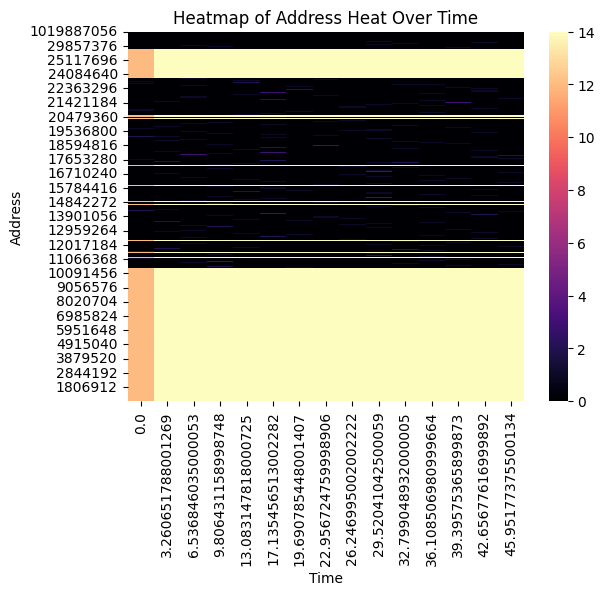

In [95]:
import seaborn as sns
heatmap_data = org_df_sorted.pivot(
    index='addr', columns='timestamp', values='hotness')
heatmap_data = heatmap_data.iloc[::-1]
# Plot the heatmap
cmap = sns.color_palette("magma", as_cmap=True)
sns.heatmap(heatmap_data, cmap=cmap)

# Display the heatmap
plt.xlabel('Time')
plt.ylabel('Address')
plt.title('Heatmap of Address Heat Over Time')
plt.show()

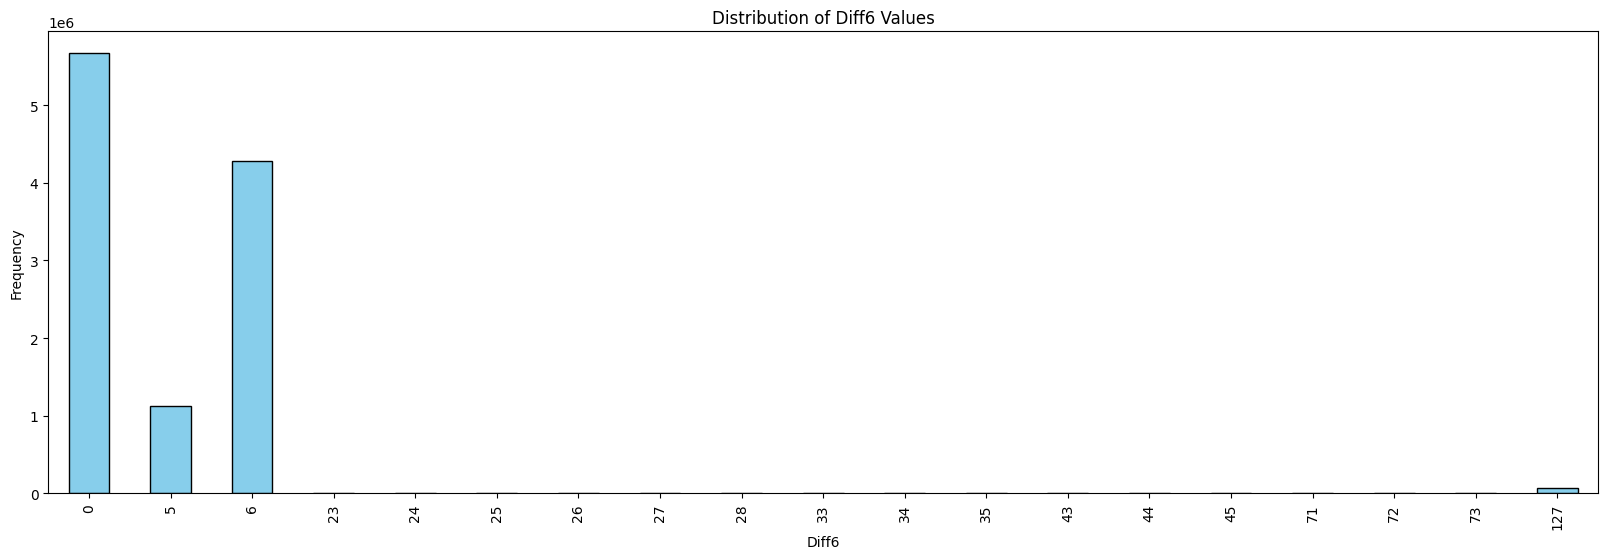

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
# data = {
#     'timestamp': [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
#     'addr': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
#     'heat': [10, 10, 30, 40, 50, 60, 70, 80, 90, 100]
# }
# test_df = pd.DataFrame(data)

# Select the column to plot the distribution (e.g., 'heat')
test_df = org_df_sorted
column_to_plot = 'diff6'

# Filter out the highest value
# max_value = test_df[column_to_plot].max()
# test_df = test_df[test_df[column_to_plot] != max_value]

# Get the value counts
value_counts = test_df[column_to_plot].value_counts().sort_index()
plt.figure(figsize=(20, 6))

# Plot the distribution using a bar chart but only for non-zero counts
value_counts[value_counts > 0].plot(
    kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_to_plot.capitalize())
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_to_plot.capitalize()} Values')

# Adjust x-axis ticks
plt.xticks(ticks=range(
    len(value_counts[value_counts > 0])), labels=value_counts[value_counts > 0].index)

# Show the plot
plt.show()